In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
task1_data = pd.read_csv(url)

In [93]:
task1_data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [94]:
task1_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

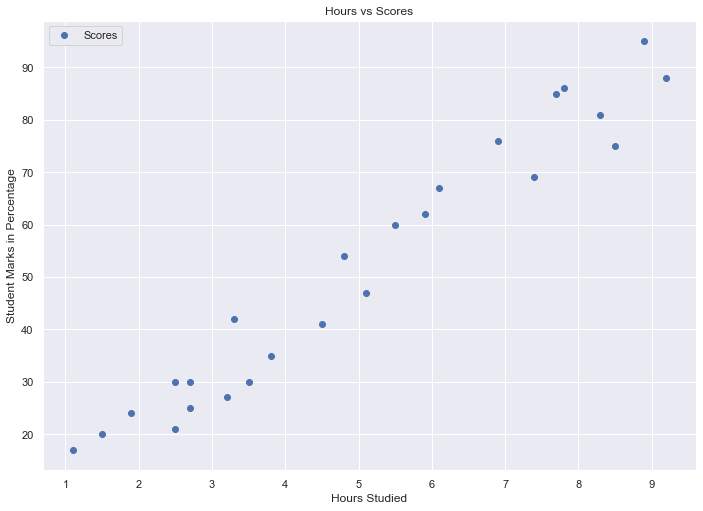

In [95]:
task1_data.plot( x = 'Hours', y = 'Scores', style = 'o')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Student Marks in Percentage")
plt.show

In [96]:
X = task1_data.iloc[:, :-1].values  
y = task1_data.iloc[:, 1].values  

In [97]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [111]:
from sklearn.linear_model import SGDRegressor

model2 = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')
model2.fit(X_train,y_train)

SGDRegressor(epsilon=0.01, eta0=0.1, penalty='elasticnet')

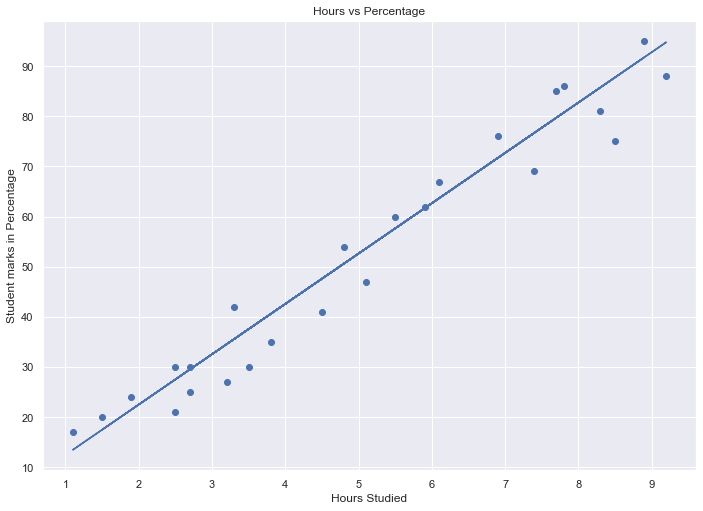

In [112]:
line = (model2.coef_ * X) + model2.intercept_

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Student marks in Percentage")
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [113]:
y_pred2 = model2.predict(X_test)

In [114]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2)) 

Mean Absolute Error: 4.123132199194622


In [115]:
task = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred2})  
task.head()

,Actual Marks,Predicted Marks
0,20,17.477204
1,27,34.548963
2,69,76.726251
3,30,27.519415
4,62,61.662934


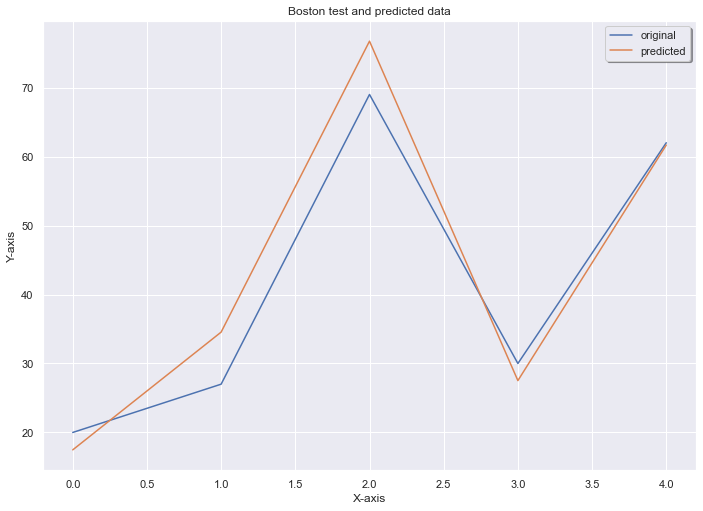

In [116]:
x_ax = range(len(y_test))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()